In [64]:
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

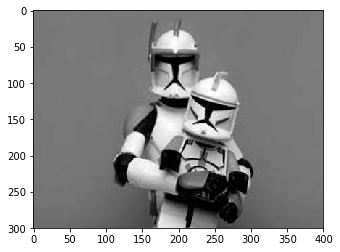

In [18]:
#load image
I = Image.open('Image_Data/i.png')
key1 = Image.open('Image_Data/key1.png')
key2 = Image.open('Image_Data/key2.png')
E = Image.open('Image_Data/E.png')
I = np.array(I)
key1 = np.array(key1)
key2 = np.array(key2)
E = np.array(E)
imshow(I,cmap=plt.cm.gray)

In [16]:
#data process
height = I.shape[0]
width = I.shape[1]
x = [[] for i in range(height) for j in range(width)]
y = []
for i in range(height):
    for j in range(width):
        x[i*width+j].append(I[i][j])
        x[i*width+j].append(key1[i][j])
        x[i*width+j].append(key2[i][j])
        y.append(E[i,j])
x = np.array(x)
y = np.array(y)

In [54]:
#initialize
w = np.zeros(len(x[0]))
l_rate =  0.0000000001
MaxIterLimit = 10000
x_t = x.transpose()

In [55]:
#training
epoch = 0
loss = 0 
loss2 = 1
while (epoch < MaxIterLimit and np.abs(loss - loss2) > 0.00000001):
    loss2 = loss
    pred = np.dot(x,w)
    cost = y - pred
    loss = np.sum(cost**2) / len(x) # Σ(y-y')^2
    gra =  -2*np.dot(x_t,cost) # -2*Σ(y-y')*x
    w = w - (l_rate * gra)
    print(loss)
    epoch+=1
print(w)

18799.8767917
1459.74166424
461.835681539
330.263262381
261.007972774
208.534686762
167.407163481
134.98296655
109.314788099
88.9107752866
72.6225409767
59.563774271
49.0486016583
40.5447274155
33.6377625586
28.0040362139
23.3898430801
19.5955785647
16.4635893178
13.8688511386
11.7118011096
9.91281332355
8.40793051672
7.14555699123
6.08388870052
5.18890979322
4.43282542728
3.79283141998
3.25014466287
2.78923599937
2.39722079092
2.06337271101
1.77873417999
1.53580287442
1.32827835638
1.15085640796
0.999061378874
0.869108953736
0.757793368422
0.662394362212
0.580600130168
0.510443302775
0.450247576594
0.39858308851
0.354228995726
0.316142016319
0.283429917709
0.255329126156
0.23118577917
0.21043966269
0.192610571737
0.177286712058
0.164114824453
0.152791766105
0.143057326469
0.134688090992
0.127492195512
0.121304838767
0.115984440976
0.111409353563
0.107475039548
0.104091656182
0.101181981616
0.0986796360432
0.0965275550022
0.0946766787567
0.0930848268947
0.0917157317736
0.0905382082372


In [58]:
#save weight
np.savetxt('Weight.txt',w)

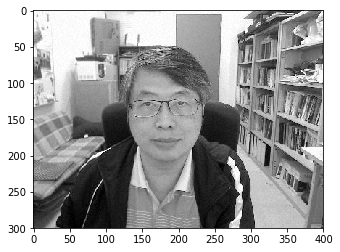

In [61]:
#decrypt
Eprime = Image.open('Image_Data/Eprime.png')
Eprime = np.array(Eprime)
ans = Image.new(mode='L', size=(E.shape[1],E.shape[0]))
p_ans = ans.load()
for i in range(E.shape[0]):
    for j in range(E.shape[1]):
        temp = (Eprime[i][j]-w[1]*key1[i][j]-w[2]*key2[i][j])/w[0]
        p_ans[j,i] = int(temp)
imshow(np.array(ans),cmap=plt.cm.gray)

In [63]:
ans.save('decrypt.png')